# Simple linear regression

## Import the relevant libraries

In [1]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

In [2]:
#Cómo subir un archivo CSV a Google Colab

from google.colab import files
files.upload()

Saving 1.01.+Simple+linear+regression.csv to 1.01.+Simple+linear+regression.csv


{'1.01.+Simple+linear+regression.csv': b'\xef\xbb\xbfSAT,GPA\r\n1714,2.4\r\n1664,2.52\r\n1760,2.54\r\n1685,2.74\r\n1693,2.83\r\n1670,2.91\r\n1764,3\r\n1764,3\r\n1792,3.01\r\n1850,3.01\r\n1735,3.02\r\n1775,3.07\r\n1735,3.08\r\n1712,3.08\r\n1773,3.12\r\n1872,3.17\r\n1755,3.17\r\n1674,3.17\r\n1842,3.17\r\n1786,3.19\r\n1761,3.19\r\n1722,3.19\r\n1663,3.2\r\n1687,3.21\r\n1974,3.24\r\n1826,3.28\r\n1787,3.28\r\n1821,3.28\r\n2020,3.28\r\n1794,3.28\r\n1769,3.28\r\n1934,3.28\r\n1775,3.29\r\n1855,3.29\r\n1880,3.29\r\n1849,3.31\r\n1808,3.32\r\n1954,3.34\r\n1777,3.37\r\n1831,3.37\r\n1865,3.37\r\n1850,3.38\r\n1966,3.38\r\n1702,3.39\r\n1990,3.39\r\n1925,3.4\r\n1824,3.4\r\n1956,3.4\r\n1857,3.41\r\n1979,3.41\r\n1802,3.41\r\n1855,3.42\r\n1907,3.42\r\n1634,3.42\r\n1879,3.44\r\n1887,3.47\r\n1730,3.47\r\n1953,3.47\r\n1781,3.47\r\n1891,3.48\r\n1964,3.49\r\n1808,3.49\r\n1893,3.5\r\n2041,3.51\r\n1893,3.51\r\n1832,3.52\r\n1850,3.52\r\n1934,3.54\r\n1861,3.58\r\n1931,3.58\r\n1933,3.59\r\n1778,3.59\r\n1975,3.6\r\n

## Load the data

In [4]:
# We start by loading the data
data = pd.read_csv('1.01.+Simple+linear+regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

In [5]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA']

In [ ]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [ ]:
y.shape

(84,)

In [ ]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

### Regression itself
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# We start by creating a linear regression object
reg = LinearRegression()

In [ ]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### R-squared

In [ ]:
# To get the R-squared in sklearn we must call the appropriate method
reg.score(x_matrix,y)

0.40600391479679754

### Coefficients

In [ ]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
reg.coef_

array([0.00165569])

### Intercept

In [ ]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

0.2750402996602799

### Making predictions

In [ ]:
# There is a dedicated method should we want to predict values
# Note that the result is an array, as we can predict more than one value at a time
reg.predict(1740)

ValueError: ignored

In [ ]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [ ]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [ ]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


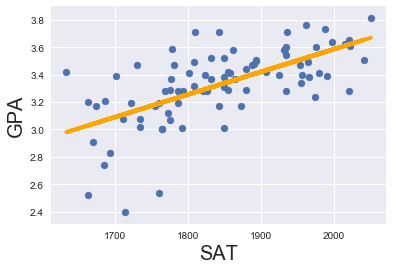

In [ ]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Non-parametrized version of the regression line
#yhat = 0.0017*x + 0.275

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()